30/11/2020

DUBOIS Thomas

manipulation pandas, numpy et matplotlib

Utilisation seaborn et sklearn

Utilisation de classification : Random Forest, Kmean, Naive Bayes

# Introduction

Pour ce Notebook nous allons utiliser une jeu de données très connu : Iris. On possède 3 types d'Iris et 4 variables portant sur les longueurs et largeurs des pétals et sépals.


Nous allons manipuler les données et en faire un premier bref déscriptif puis nous mettrons en place plusieurs méthodes de classification.

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

In [10]:
from sklearn import datasets
iris_data = datasets.load_iris()

In [11]:
print(type(iris_data))

<class 'sklearn.utils.Bunch'>


Bon... en soit on peut très bien réaliser le travail avec ce type de données, mais de manière général on aime passer par un data frame pour garder tout le temps la même structure.

On va donc commencer par transformer cette structure en df.

In [16]:
print(dir(iris_data))

['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [17]:
print(iris_data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [18]:
data = iris_data.data

In [19]:
data[:5] #5 permieres lignes

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [20]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Ce sont les 3 especes connues, les 3 réponses

In [21]:
target = iris_data.target

In [22]:
df = pd.DataFrame(data, columns=iris_data['feature_names'] )
df['target'] = target
df['label'] = df.apply(lambda x: iris_data['target_names'][int(x.target)], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


On va regarder la répartition selon les trois types d'especes :

In [24]:
for i in range(3):
    print("classe : ",i,", nb exemplaires: ",len(df['target'][ df['target'] == i]) ," (",iris_data.target_names[i],")" )

classe :  0 , nb exemplaires:  50  ( setosa )
classe :  1 , nb exemplaires:  50  ( versicolor )
classe :  2 , nb exemplaires:  50  ( virginica )


In [25]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
label                0
dtype: int64

Très bien, pas de Na.

In [26]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Affichons avec seaborn la répartition des especes en fonction des variables :

C:\Users\utilisateur\.julia\conda\3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


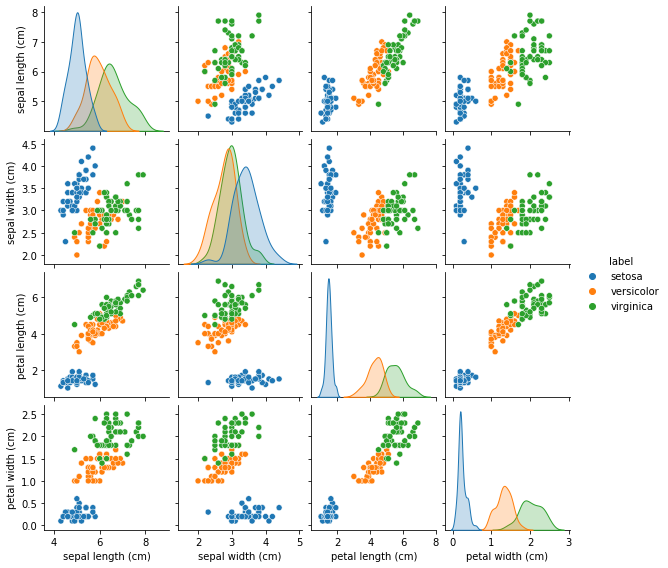

In [28]:
import seaborn as sns

sns.pairplot(df, hue='label', vars=iris_data['feature_names'], size=2);

On voit que les petales semblent bien plus démarquer que les sepales !
On peut aussi le voir en construisant nous même les plots :

[]

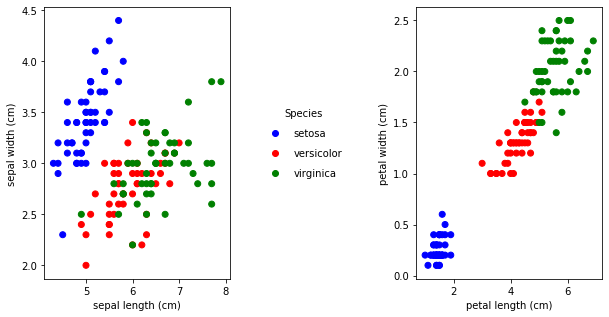

In [27]:
fig = plt.figure(figsize=(10, 5))
fig.subplots_adjust(hspace=1, wspace=1)

color_list = ['blue', 'red', 'green']
colors = [color_list[c] for c in iris_data.target]

# plot 1
ax1 = plt.subplot(1,2,1)

ax1.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=colors)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

# plot 2
ax2 = plt.subplot(1,2,2)

ax2.scatter(df['petal length (cm)'],df['petal width (cm)'], color=colors)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

# legend
for ind, s in enumerate(iris_data.target_names):
    # on dessine de faux points, car la légende n'affiche que les points ayant un label
    plt.scatter([], [], label=s, color=color_list[ind])

plt.legend(scatterpoints=1, frameon=False, labelspacing=1, 
           bbox_to_anchor=(-0.35, 0.5) , loc="center right", title='Species')
plt.plot()

Bon.. tout est clair, forte séparation des groupes de part les longueurs et largeurs de pétales!

On peut essayer de voir la correlation entre les variables :

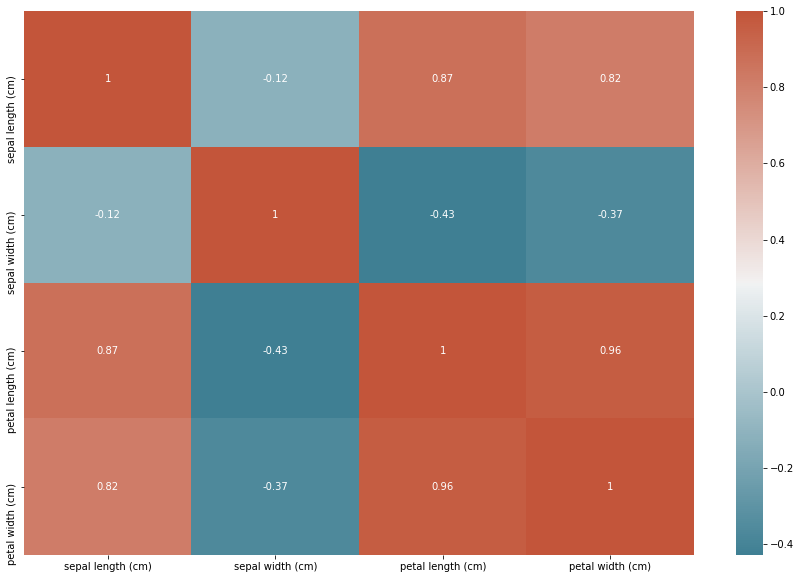

In [54]:
corr = df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Fortes correlations ! mise à part peut etre pour l'épaisseur des sepales. Il peut être interessant de faire une ACP pour voir les nouvelles variables ainsi construites ! Ce n'est pas forcement interessant de part le nombre de variables faible mais peu etre interessant étant donné la correlation.

# ACP

In [35]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [37]:
liste_df = list(df)

In [39]:
df[liste_df[0:-2]].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [40]:
n = df[liste_df[0:-2]].shape[0]
p = df[liste_df[0:-2]].shape[1] #car target te label
print(n,p)

150 4


On standardise les données

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_standardise = sc.fit_transform(df[liste_df[0:-2]])
df_standardise

print(np.mean(df_standardise,axis=0)) #presque 0 car erreur de trancature
print(np.std(df_standardise,axis=0))  #1


[-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
[1. 1. 1. 1.]


In [56]:
from sklearn.decomposition import PCA
acp = PCA(svd_solver='full')
coord = acp.fit_transform(df_standardise)
print(acp.n_components_)  #car on a tout gardé ici

4


[2.91849782 0.91403047 0.14675688 0.02071484]


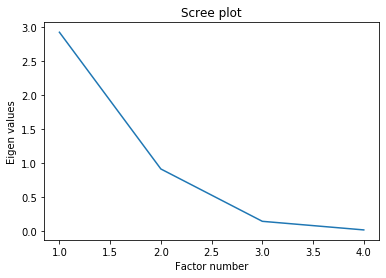

In [57]:
eigval = (n-1)/n*acp.explained_variance_
print(eigval) #valeur corrigée
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

Compliqué à choisir car peu de variables, mais on peut choisir entre 2 et 3.

In [58]:
print(acp.singular_values_**2/n) #ou valeurs singulieres

[2.91849782 0.91403047 0.14675688 0.02071484]


[0.72962445 0.95813207 0.99482129 1.        ]


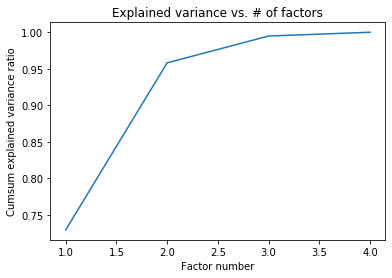

In [59]:
prop_var = acp.explained_variance_ratio_ #proportion de variance expliquée
prop_var = np.cumsum(prop_var)
print(prop_var)
#cumul de variance expliquée
plt.plot(np.arange(1,p+1),prop_var)
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

Cette fois on semble plus s'orrienter vers 2-3 valeurs.

In [60]:
#seuils pour test des bâtons brisés
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]
#test des bâtons brisés
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

   Val.Propre    Seuils
0    2.918498  2.083333
1    0.914030  1.083333
2    0.146757  0.583333
3    0.020715  0.250000


De part la règle de Kaiser, pour une ACP normée, la somme des valeurs propres étant égale au nombre de variables, leur moyenne vaut 1. On considère ainsi qu’un axe est intéressant si sa valeur propre est supérieure 1.

Ici on est tenté entre 1 variable et 2 car la deuxieme est à 0,9...

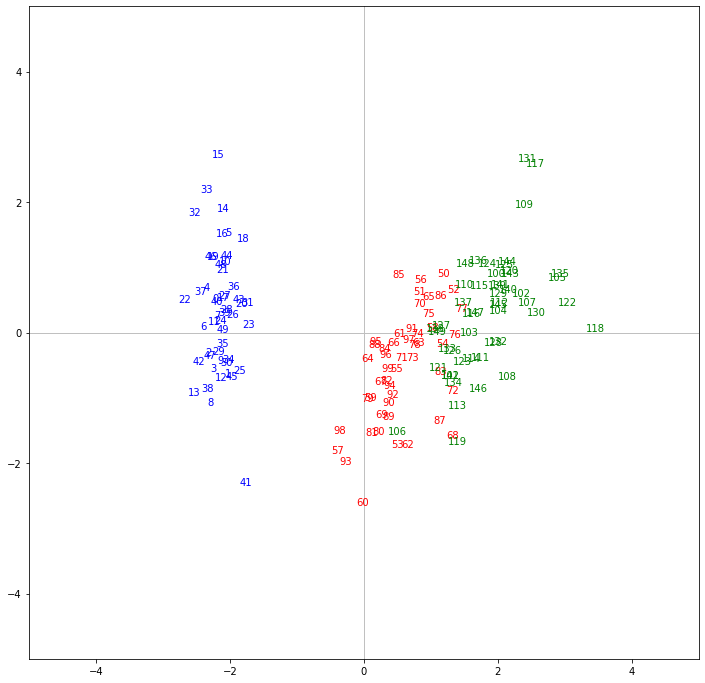

In [61]:
color_list = ['blue', 'red', 'green']
colors = [color_list[c] for c in df['target']]
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-5,5) #même limites en abscisse
axes.set_ylim(-5,5) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
     plt.annotate(df.index[i],(coord[i,0],coord[i,1]),color=colors[i])
#ajouter les axes
plt.plot([-5,5],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-5,5],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

Pas sur qu'on soit mieux qu'avec les variables de départ, surement du au faite que l'on avait peu de variables (4).
La classe bleue est très bien séparée, les deux autres beaucoup moins.

# Résolution par Apprentissage


## Naive Bayes

"modèle à caractéristiques statistiquement indépendantes " : créé donc des classes en partant du principe que chaque paramètre est indépendant

In [64]:
from sklearn.naive_bayes import GaussianNB

In [65]:
df2 = df[liste_df[0:-2]]

In [66]:
clf = GaussianNB()
clf.fit(df2, df['target']) #on entraine notre modele

GaussianNB()

In [67]:
clf.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [68]:
result = clf.predict(df2)
result

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

On a testé les résultats sur le même jeu de données, testons la qualité des prédictions :

In [69]:
nb_error = 0
for i in (result - target):
    if i !=0:
        nb_error += 1
print("Nombre de valeurs fausses : "+str(nb_error))
print("Pourcentage de valeurs justes : "+str((len(result)-nb_error)*100/len(result)))

Nombre de valeurs fausses : 6
Pourcentage de valeurs justes : 96.0


on a quand meme 6 erreurs de prédiction sur 150

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(result, target)

0.96

Nous donne un score plus "travaillé"


On peut décider de vouloir savoir où sont les erreurs : 

In [71]:
from sklearn.metrics import confusion_matrix
mat_conf = confusion_matrix(target, result)
mat_conf

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]], dtype=int64)

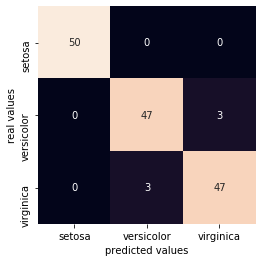

In [72]:
sns.heatmap(mat_conf, square=True, annot=True, cbar=False
            , xticklabels=list(iris_data.target_names)
            , yticklabels=list(iris_data.target_names))
plt.xlabel('predicted values')
plt.ylabel('real values');

0 erreurs sur Setosa, si on regarde sur les Graphs ci dessus on avait bien identifié que les setosas étaient très bien séparés ! Donc, logique !

# Apprentissage Validation

On utilise une méthode par apprentissage validation en créant des jeux de données 70% / 30%

In [73]:
from sklearn.model_selection import train_test_split # version 0.18.1
# split la data en 70%/30%
data_test = train_test_split(df2, target
                                 , random_state=0
                                 , train_size=0.7)
#data_test est une liste de 4 DF :
data_train, data_test, target_train, target_test = data_test

In [74]:
clf = GaussianNB()
clf.fit(data_train, target_train)
result = clf.predict(data_test)
target = target_test

In [75]:
nb_error = 0
for i in (result - target):
    if i !=0:
        nb_error += 1
print("Nombre de valeurs fausses : "+str(nb_error))
print("Pourcentage de valeurs justes : "+str((len(result)-nb_error)*100/len(result)))

Nombre de valeurs fausses : 0
Pourcentage de valeurs justes : 100.0


In [76]:
accuracy_score(result, target_test)

1.0

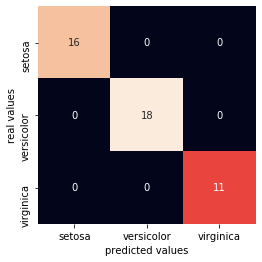

In [77]:
mat_conf = confusion_matrix(target, result)
sns.heatmap(mat_conf, square=True, annot=True, cbar=False
            , xticklabels=list(iris_data.target_names)
            , yticklabels=list(iris_data.target_names))
plt.xlabel('predicted values')
plt.ylabel('real values');

Perfect !

# Affichage des territoires de classification

Méthode : On créé une espece de matrice avec toutes les valeurs possibles et on voit quelles valeurs leur attribu notre algo.

In [29]:
data_sepales = df[['sepal length (cm)','sepal width (cm)']]

In [30]:
target = df['target']

In [31]:
# On réapprend
clf = GaussianNB()
clf.fit(data_sepales, target)
h = 0.1 #epaisseur de notre "grillage" de valeurs
μ = 0.5 #valeur dont on repousse un peu les predictions par rapport aux valeurs max et min
#attention ne pas trop pousser !
# On cherche les valeurs min/max de longueurs (x)/largeurs (y) des sépales
x_min = df['sepal length (cm)'].min() - μ
x_max = df['sepal length (cm)'].max() + μ

y_min = df['sepal width (cm)'].min() - μ
y_max = df['sepal width (cm)'].max() + μ

x = np.arange(x_min, x_max, h) #plages de valeurs utilisées celon x
y = np.arange(y_min, y_max, h) #plages de valeurs utilisées celon y

On créé alors une meshgrid de ces valeurs (espèce de matrice 2D de nos plages de valeurs)

In [32]:
xx, yy = np.meshgrid(x,y )

In [33]:
data_vizu = list(zip(xx.ravel(), yy.ravel()) )  #ligne tres technique... explication ci apres :

Dans xx on contient len(y) vecteurs possédant chacun toutes les valeurs de x :

In [34]:
print(xx)
print(len(xx))
print(len(xx[0]))

[[3.8 3.9 4.  ... 8.1 8.2 8.3]
 [3.8 3.9 4.  ... 8.1 8.2 8.3]
 [3.8 3.9 4.  ... 8.1 8.2 8.3]
 ...
 [3.8 3.9 4.  ... 8.1 8.2 8.3]
 [3.8 3.9 4.  ... 8.1 8.2 8.3]
 [3.8 3.9 4.  ... 8.1 8.2 8.3]]
34
46


pour yy c'est l'inverse : chaque vecteur contient une unique valeur de y repété len(x) fois

In [35]:
print(yy)
print(len(yy))
print(len(yy[0]))

[[1.5 1.5 1.5 ... 1.5 1.5 1.5]
 [1.6 1.6 1.6 ... 1.6 1.6 1.6]
 [1.7 1.7 1.7 ... 1.7 1.7 1.7]
 ...
 [4.6 4.6 4.6 ... 4.6 4.6 4.6]
 [4.7 4.7 4.7 ... 4.7 4.7 4.7]
 [4.8 4.8 4.8 ... 4.8 4.8 4.8]]
34
46


ravel concatene les vetceurs d'une matrice :

In [36]:
print(xx.ravel())
print(len(xx.ravel()))
print(len(xx)*len(xx[0]))

[3.8 3.9 4.  ... 8.1 8.2 8.3]
1564
1564


zip quand a lui récupere pour une suite de liste la premiere valeur de chaque liste pour faire une premiere suite

puis la deuxieme valeur de chaque liste pour en faire une nouvelle

etc

Ainsi :

In [37]:
data_vizu[:10]

[(3.8, 1.5),
 (3.9, 1.5),
 (4.0, 1.5),
 (4.1, 1.5),
 (4.2, 1.5),
 (4.300000000000001, 1.5),
 (4.4, 1.5),
 (4.5, 1.5),
 (4.6000000000000005, 1.5),
 (4.700000000000001, 1.5)]

Text(0, 0.5, 'petal width (cm)')

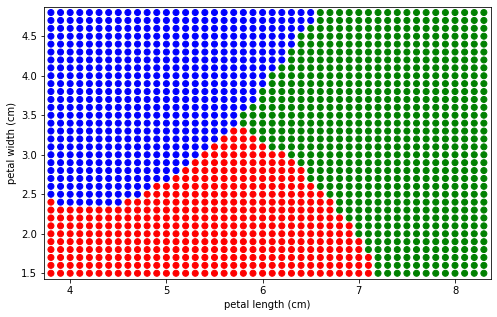

In [38]:
z = clf.predict(data_vizu)

fig = plt.figure(figsize=(8, 5))

color_list = ['blue', 'red', 'green']
colors = [color_list[c] for c in z]


plt.scatter(xx.ravel(), yy.ravel(), c=colors)
plt.xlim(xx.min() - .07, xx.max() + .07)
plt.ylim(yy.min() - .07, yy.max() + .07)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

Cela parait très joli, mais est-ce efficace ? On peut afficher nos valeurs connus pour voir si ce modèle est fiable ou non

Pour cela on met z au meme format que xx et yy pour utiliser colormesh

In [39]:
zz= z.reshape(xx.shape)

In [40]:
zz

array([[1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])

Text(0, 0.5, 'petal width (cm)')

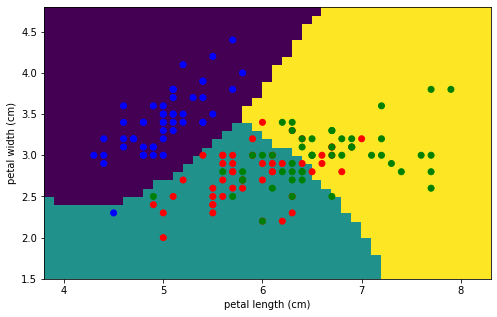

In [41]:
fig = plt.figure(figsize=(8, 5))

plt.pcolormesh(xx, yy, zz) # Affiche les déductions en couleurs pour les couples x,y

# Plot also the training points
color_list = ['blue', 'red', 'green']
colors = [color_list[c] for c in target]
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'], c=colors)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

A noter qu'on aurait pu utiliser directement colormesh au lieu de scatter

On remarque que notre prédiction n'est pas vraiment parfaite, c'est déjà ce que l'on avait remarqué précédemment lorsque l'on utilise uniquement les pétales et pas les sépales

# Méthode des K plus proches voisins

Cette méthode d'apprentissage utilise comme son nom l'indique la distance avec les voisins les plus proches pour déterminer les classes

K represente le nombre de voisins que l'on veut utiliser.

Avec k (trop) faible on risque d'avoir affaire à du sous apprentissage (underfitting) et donc pas de prédictions.

Avec k (trop) fort   on risque d'avoir affaire à du sur apprentissage (overfitting) et donc trop coller à notre échantillon.

In [42]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier()

In [43]:
from ipywidgets import interact
@interact(k=(0,30))
def k_change(k=5):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(data_sepales, target)
    z = clf.predict(data_vizu)
    zz = z.reshape(xx.shape)
    fig = plt.figure(figsize=(8, 5))
    plt.pcolormesh(xx, yy, zz)
    

    color_list = ['blue', 'red', 'green']
    colors = [color_list[c] for c in target]
    plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'], c=colors)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('petal length (cm)')
    plt.ylabel('petal width (cm)')

interactive(children=(IntSlider(value=5, description='k', max=30), Output()), _dom_classes=('widget-interact',…

Etant donné que l'on a plusieurs valeurs possibles pour k (ici on a choisi de 1 à 30 mais les extremes sont forcément 'mauvais') on peu essayer de trouver un K "optimal"

In [44]:
@interact(p=(30,70))
def p_change(p=50):
    # split the data in 80%/20% in each set
    data_test = train_test_split(data_sepales, target
                                     , random_state=0
                                     , train_size=p/100)
    #data_test est une liste de 4 DF :
    data_train, data_test, target_train, target_test = data_test
    result    = []
    k_values  = range(1,30)

    for k in k_values:
        clf   = neighbors.KNeighborsClassifier(n_neighbors=k)
        clf.fit(data_train, target_train)
        z     = clf.predict(data_test)
        score = accuracy_score(z, target_test)
        result.append(score)

    fig = plt.figure(figsize=(8, 5))
    plt.plot(k_values, result)

interactive(children=(IntSlider(value=50, description='p', max=70, min=30), Output()), _dom_classes=('widget-i…

En essayant de faire varier la proportion de l'échantillonage apprentissage/validation on voit que la valeur optimale du k reste très fou mais il semble y avoir une valeur interessante aux alentours de 20 !

# Et si on passait par un modèle d'apprentissage non supervisé ?

Pour cela il ne faut donc pas utiliser la donnée target qui renferme les 3 espèces.

On peut alors voir si les groupes qui font être formés vont être les mêmes !

## On commence par réduire le nombre de variables 

En effet bien souvent pour les modèles d'apprentissage non supervisé on utilise beaucoup de paréamètres pour ne perdre aucune information, puis on essaye de créer des nouvelles variables à partir de celles de départ, on utilise ici un ACP (Analyse en Composantes Principales).

Ici il suffit de choisir le nombre de composantes finales voulues, de donner notre jeu de données puis d'obtenir ces nouvelles composantes.

In [59]:
df_non_sup = df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]

In [60]:
from sklearn.decomposition import PCA

model = PCA(n_components=2)
model.fit(df_non_sup)
df_reduc = pd.DataFrame(model.transform(df_non_sup), columns = ['C1', 'C2'])


Ainsi on a transformé notre data de 4 composantes original :

In [61]:
df_non_sup.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


En une nouvelle data contenant "autant d'informations" mais avec seulement 2 composantes (que l'on a nommé C1 et C2) :

In [62]:
df_reduc.head()

,C1,C2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


Il pourrait être interessant de voir si les 2 nouvelles composantes différencient bien les 3 espèces de fleurs.

In [63]:
df_reduc['label'] = df['label']

In [64]:
df_reduc.head()

,C1,C2,label
0,-2.684126,0.319397,setosa
1,-2.714142,-0.177001,setosa
2,-2.888991,-0.144949,setosa
3,-2.745343,-0.318299,setosa
4,-2.728717,0.326755,setosa


On peut voir ca soit de manière automatique :

C:\Users\utilisateur\.julia\conda\3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


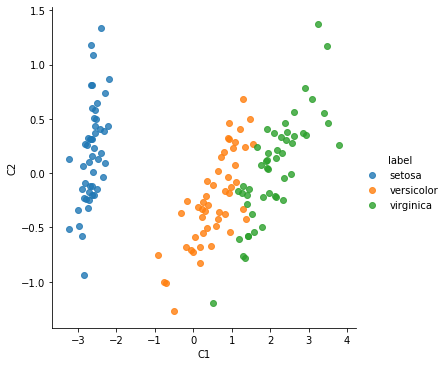

In [79]:
sns.lmplot("C1", "C2", hue='label', data=df_reduc, fit_reg=False)

Soit en voulant gérer un peu plus les choses :

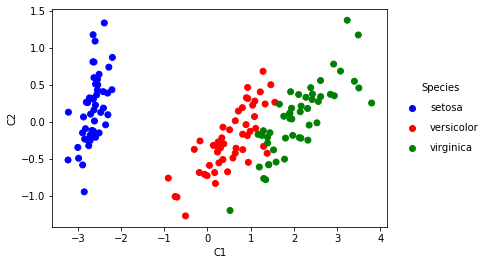

In [75]:
color_list = ['blue', 'red', 'green']
colors = [color_list[c] for c in iris_data.target]

plt.scatter(df_reduc['C1'], df_reduc['C2'], c=colors)
plt.xlabel('C1')
plt.ylabel('C2')

for ind, s in enumerate(iris_data.target_names):
    # on dessine de faux points, car la légende n'affiche que les points ayant un label
    plt.scatter([], [], label=s, color=color_list[ind])

plt.legend(scatterpoints=1, frameon=False, labelspacing=1, 
           bbox_to_anchor=(1.3, 0.5) , loc="center right", title='Species')

On remarque donc que nos 2 nouvelles composantes conservent bien les classes, et les bonnes !

# Clustering

On va maintenant créer des regroupement par clustering, on va commencer par choisir Kmeans :



In [102]:
from sklearn.cluster import KMeans

model_kmeans = KMeans(n_clusters=3, random_state=0)
model_kmeans.fit(df_reduc[['C1', 'C2']])

groups_kmeans = model_kmeans.predict(df_reduc[['C1', 'C2']])

df_reduc['group_kmeans'] = groups_kmeans

C:\Users\utilisateur\.julia\conda\3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


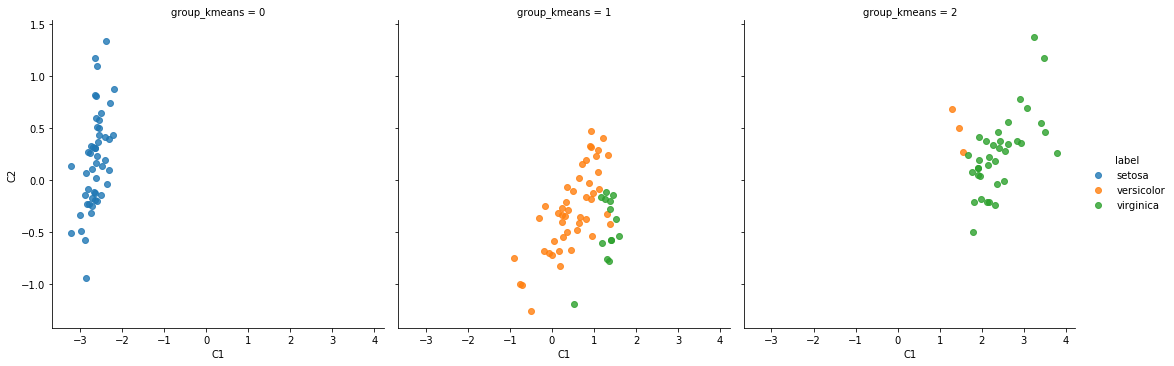

In [103]:
sns.lmplot("C1", "C2", data=df_reduc, hue='label',
           col='group_kmeans', fit_reg=False)

Ca ne match vraiment pas bien... Il se trouve que Kmean fonctionne tres bien avec des formes... en forme de cercle ! Or nous avons ici plutot des elipses, on essaye alors GMM (Gaussian Mixture Models) qui est la méthode la plus rapide et qui s'adapte à beaucoup de "formes" de groupes, attention toutefois l'ACP est nécéssaire au préalable car il utilisera toutes composantes !

In [104]:
from sklearn.mixture import GaussianMixture

model_GMM = GaussianMixture (n_components=3, covariance_type='full')
model_GMM.fit(df_reduc[['C1', 'C2']])
groups_GMM = model_GMM.predict(df_reduc[['C1', 'C2']])

df_reduc['group_GMM'] = groups_GMM

C:\Users\utilisateur\.julia\conda\3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


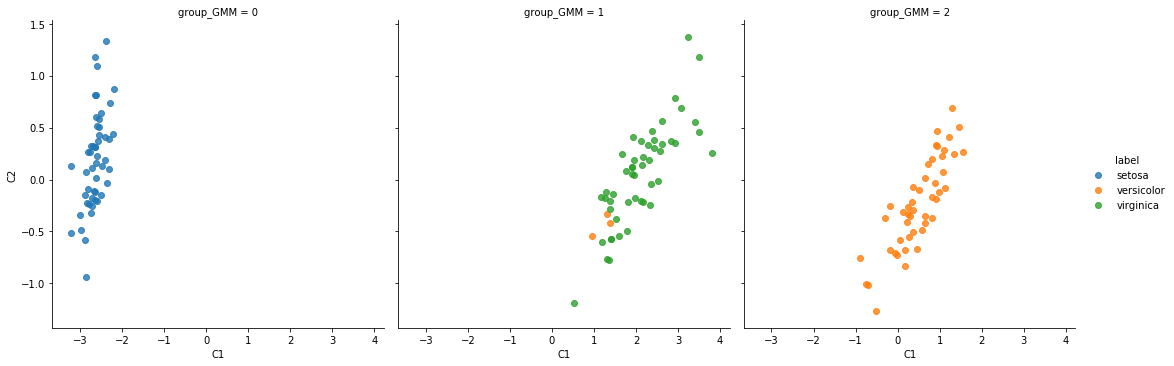

In [105]:
sns.lmplot("C1", "C2", data=df_reduc, hue='label',
           col='group_GMM', fit_reg=False)

Malgré 3 erreurs c'est bien mieux ! De toute facon les deux groupes étant très proches cela reste un très bon groupement.